In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('advertising.csv')

In [3]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0


## Logistic Regression

In [4]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=90)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [7]:
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [9]:
y_test

221    0
825    0
334    0
982    1
42     0
      ..
246    1
998    0
126    1
289    1
93     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [10]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [11]:
confusion_matrix(y_test, y_pred)

array([[100,   5],
       [  7,  88]], dtype=int64)

In [12]:
accuracy_score(y_test, y_pred)

0.94

## SVM

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [14]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [15]:
from sklearn.svm import SVC

In [16]:
model = SVC(kernel='linear')

In [17]:
model.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [19]:
y_test

221    0
825    0
334    0
982    1
42     0
      ..
246    1
998    0
126    1
289    1
93     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [20]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [21]:
confusion_matrix(y_test, y_pred)

array([[99,  6],
       [ 4, 91]], dtype=int64)

In [22]:
accuracy_score(y_test, y_pred)

0.95

## KNN

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [24]:
model.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [25]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [26]:
y_test

221    0
825    0
334    0
982    1
42     0
      ..
246    1
998    0
126    1
289    1
93     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [27]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [28]:
confusion_matrix(y_test, y_pred)

array([[102,   3],
       [  9,  86]], dtype=int64)

In [29]:
accuracy_score(y_test, y_pred)

0.94

In [30]:
scores = []
for k in range(1, 50):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test, y_pred)
    scores.append(score)

In [31]:
scores

[0.935,
 0.935,
 0.945,
 0.94,
 0.94,
 0.94,
 0.94,
 0.94,
 0.945,
 0.94,
 0.94,
 0.94,
 0.945,
 0.945,
 0.95,
 0.945,
 0.95,
 0.945,
 0.95,
 0.95,
 0.955,
 0.95,
 0.95,
 0.95,
 0.945,
 0.95,
 0.95,
 0.96,
 0.96,
 0.965,
 0.96,
 0.965,
 0.96,
 0.96,
 0.955,
 0.96,
 0.96,
 0.965,
 0.965,
 0.965,
 0.965,
 0.965,
 0.965,
 0.965,
 0.965,
 0.965,
 0.96,
 0.965,
 0.965]

In [32]:
np.argmax(scores) + 1

30

In [33]:
np.max(scores)

0.965

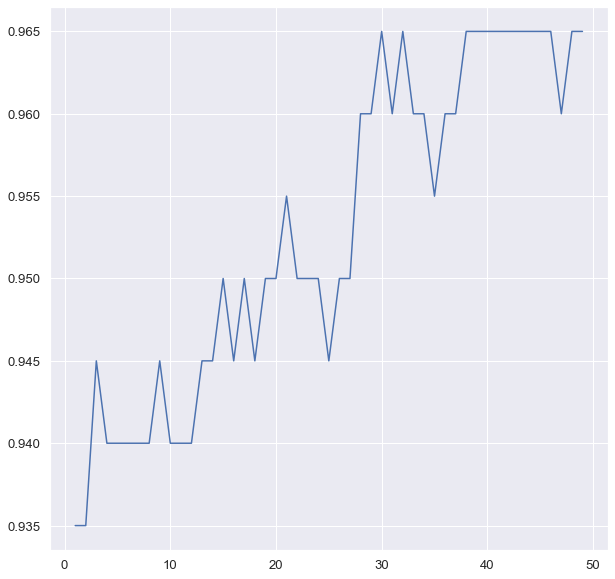

In [34]:
plt.plot(range(1, 50), scores)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=np.argmax(scores) + 1)

In [36]:
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.965

In [37]:
confusion_matrix(y_test, y_pred)

array([[105,   0],
       [  7,  88]], dtype=int64)

## Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [39]:
model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [40]:
x_train.shape

(800, 5)

In [41]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1], dtype=int64)

In [42]:
y_test

221    0
825    0
334    0
982    1
42     0
      ..
246    1
998    0
126    1
289    1
93     1
Name: Clicked on Ad, Length: 200, dtype: int64

In [43]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [44]:
confusion_matrix(y_test, y_pred)

array([[93, 12],
       [ 6, 89]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred)

0.91